In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import dash_bio

In [2]:
plt.style.use('jr')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False

In [27]:
var_tbl = pd.read_csv("../../resources/gRNA_info/LDLvar_gRNA_bean_accessibility.csv")

In [28]:
var_tbl

,name,target_variant,Target descriptor,Arbitrary number,gRNA position category,Target base position in gRNA,Target base position in reporter,BE,target_group,sequence,...,target_group2,SNP,var_id,genomic_pos,chr,index,parsed_snp,CHR,HG19 BP,accessibility
0,CONTROL_1_g1,CONTROL,NaN,1,g1,4,10,ABE,NegCtrl,CCTACGCGGTAGGGAACTTT,...,NegCtrl,CONTROL_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control
1,CONTROL_1_g2,CONTROL,NaN,1,g2,5,11,ABE,NegCtrl,CCCTACGCGGTAGGGAACTT,...,NegCtrl,CONTROL_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control
2,CONTROL_1_g3,CONTROL,NaN,1,g3,5,12,ABE,NegCtrl,CCCTACGCGGTAGGGAACT,...,NegCtrl,CONTROL_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control
3,CONTROL_1_g4,CONTROL,NaN,1,g4,7,13,ABE,NegCtrl,AGCCCTACGCGGTAGGGAAC,...,NegCtrl,CONTROL_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control
4,CONTROL_1_g5,CONTROL,NaN,1,g5,8,14,ABE,NegCtrl,AAGCCCTACGCGGTAGGGAA,...,NegCtrl,CONTROL_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,rs9987289_Maj_ABE_347_g1,rs9987289,Maj,347,g1,3,10,ABE,Variant,GCATCAATATCACGTGGAA,...,Variant,rs9987289,NaN,9183358.0,chr8,449.0,rs9987289,chr8,9183358.0,-1.8463162450439916
3451,rs9987289_Maj_ABE_347_g2,rs9987289,Maj,347,g2,4,11,ABE,Variant,GGCATCAATATCACGTGGA,...,Variant,rs9987289,NaN,9183358.0,chr8,449.0,rs9987289,chr8,9183358.0,-1.8463162450439916
3452,rs9987289_Maj_ABE_347_g3,rs9987289,Maj,347,g3,6,12,ABE,Variant,TGGGCATCAATATCACGTGG,...,Variant,rs9987289,NaN,9183358.0,chr8,449.0,rs9987289,chr8,9183358.0,-1.8463162450439916
3453,rs9987289_Maj_ABE_347_g4,rs9987289,Maj,347,g4,7,13,ABE,Variant,TTGGGCATCAATATCACGTG,...,Variant,rs9987289,NaN,9183358.0,chr8,449.0,rs9987289,chr8,9183358.0,-1.8463162450439916


In [29]:
gwas_tbl['in_var_lib'] = False
gwas_tbl.loc[gwas_tbl.variant_id.isin(var_tbl["target_variant"]), 'in_var_lib'] = True

In [23]:
gwas_tbl = pd.read_table("../../resources/LDLvar/candidates/GCST90002412_buildGRCh37.tsv")

<ipython-input-23-cc24f659e711>:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [24]:
gwas_tbl

,variant_id,p_value,chromosome,base_pair_location,ci_lower,ci_upper,beta,standard_error,effect_allele,other_allele,effect_allele_frequency
0,NaN,0.83,1,10616,-0.039803,0.031906,-0.003949,0.018293,CCGCCGTTGCAAAGGCGCGCCG,C,0.005821
1,NaN,0.37,1,46285,-0.088526,0.032792,-0.027867,0.030949,ATAT,A,0.997850
2,NaN,0.44,1,62838,-0.039805,0.092054,0.026125,0.033638,TTAA,T,0.998234
3,NaN,0.93,1,63735,-0.005750,0.006277,0.000263,0.003068,CCTA,C,0.683944
4,NaN,0.43,1,66435,-0.108945,0.045979,-0.031483,0.039522,ATT,A,0.998822
...,...,...,...,...,...,...,...,...,...,...,...
16759642,rs557132,0.30,23,154929412,-0.001719,0.005553,0.001917,0.001855,C,T,0.754434
16759643,rs762503228,0.18,23,154929637,-0.001175,0.006431,0.002628,0.001940,CT,C,0.771264
16759644,rs775521832,0.31,23,154929952,-0.001829,0.005827,0.001999,0.001953,CAA,C,0.760616
16759645,rs781880,0.25,23,154930230,-0.001483,0.005788,0.002153,0.001855,A,G,0.753999


In [13]:
gwas_tbl.loc[gwas_tbl.P == 0.0, "P"] = 1e-500

In [12]:
min(gwas_tbl.loc[gwas_tbl.P > 0.0, "P"])

5e-324

In [20]:
df_grouped

In [33]:
plt.style.use('jr')

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_anbe_py38/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log10



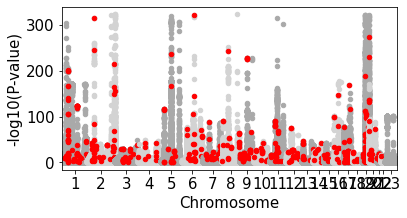

In [35]:
# https://python-graph-gallery.com/manhattan-plot-with-matplotlib/
# import libraries
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

df = gwas_tbl
# -log_10(pvalue)
df['minuslog10pvalue'] = -np.log10(df.p_value)
df.chromosome = df.chromosome.astype('category')
df = df.sort_values('chromosome')

# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby(('chromosome'))

# manhattan plot
fig = plt.figure(figsize=(6, 3)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkgrey','lightgrey']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue', color=colors[num % len(colors)], ax=ax)
    group.loc[group.in_var_lib].plot(kind='scatter', x='ind', y='minuslog10pvalue', color="red", ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('-log10(P-value)')
# show the graph
plt.show()


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_anbe_py38/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log10



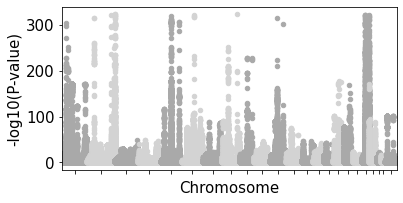

In [39]:
# https://python-graph-gallery.com/manhattan-plot-with-matplotlib/
# import libraries
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

df = gwas_tbl
# -log_10(pvalue)
df['minuslog10pvalue'] = -np.log10(df.p_value)
df.chromosome = df.chromosome.astype('category')
df = df.sort_values('chromosome')

# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby(('chromosome'))

# manhattan plot
fig = plt.figure(figsize=(6, 3)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkgrey','lightgrey']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue', color=colors[num % len(colors)], ax=ax, rasterized=True)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('-log10(P-value)')
ax.set_xticklabels([])
# show the graph
plt.show()
fig.savefig("gwas_schema.pdf", bbox_inches="tight")